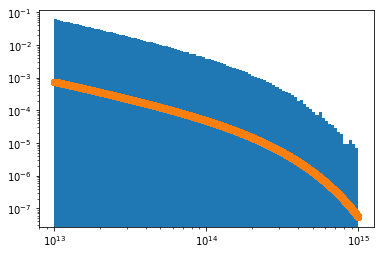

[1.04413780e+13 6.19399377e+13 2.10953651e+14 ... 1.10570532e+13
 1.74663460e+13 2.37617560e+13]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.interpolate import interp1d
lower_limit =13
upper_limit =15
nbinhist=100
norm = (upper_limit-lower_limit)/nbinhist

M_star = 2.e14
b=4*10**(-5)
numsamp= 10**6
numstep = 10**4

#define x range 1e12-1e15 in num steps
x = np.logspace(lower_limit,upper_limit,numstep)
#define y values from the function 
y = (b*(1/(x/M_star))*np.exp(-(x)/M_star))

#calculate cumulative sum of the y values (numpy)
y_cm = np.cumsum(y)
y_cm = y_cm-min(y_cm)
y_cm = y_cm/np.max(y_cm)

#invert x and y variables (flipping)and interpolate that function 
f = interp1d(y_cm,x , fill_value=(0,1))
#Generate N random numbers uniformly between 0 & 1: u_i~U(0,1)
ynew = np.random.random(numsamp)
#Using the Inverse of the CDF and the values u_i, compute x_i = F^-1(u_i)
x_samp = f(ynew) 

#plot it to see the result
plt.hist(x_samp, bins=np.logspace(lower_limit,upper_limit,nbinhist),weights=np.repeat(numsamp/sum(y*x),numsamp)/norm)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, y, 'o')
plt.show()

print(x_samp) #cluster_mass
